In [1]:
import eos

In [2]:
class TestObservable:
    kinematic_variables = ['q2']

    def __init__(self, parameters:eos.Parameters, kinematics:eos.Kinematics, options:eos.Options):
        self.parameters = parameters
        self.kinematics = kinematics
        self.options = options

        self.q2 = kinematics['q2']
        self.mB = parameters['mass::B_d']

    def evaluate(self):
        q2 = self.q2.evaluate()
        mB = self.mB.evaluate()

        return 1.0 / (1.0 - q2 / mB**2)


In [3]:
oe = eos.register_python_observable("test::observable(q2)", TestObservable, "\\mathcal{O}", eos.Unit.Unity())

In [4]:
oe

QualifedName,test::observable(q2)
Description,$$\mathcal{O}$$
Kinematic Variables,q2


In [5]:
eos.Observables()['test::observable(q2)']

QualifedName,test::observable(q2)
Description,$$\mathcal{O}$$
Kinematic Variables,q2


In [6]:
p = eos.Parameters()
k = eos.Kinematics(q2=0.0)
o = eos.Options()

obs = eos.Observable.make("test::observable(q2)", p, k, o)

In [7]:
obs.evaluate()

1.0

Handling item to plot test::observable(q2)
Handling item to plot test::observable(q2)


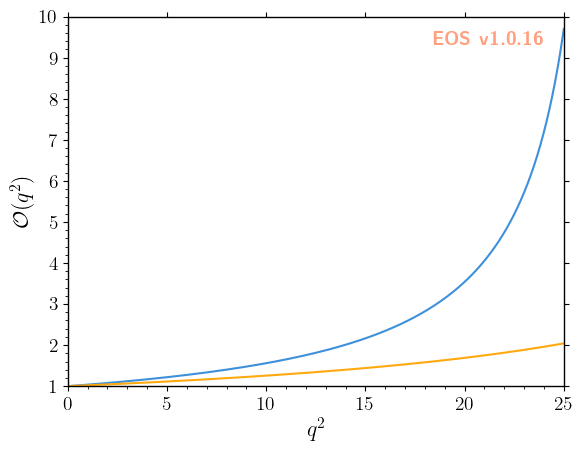

In [8]:
figure_args = """
plot:
  xaxis: { label: '$q^2$',                range: [0.0, 25.0]   }
  yaxis: { label: '$\\mathcal{O}(q^2)$',  range: [1.0, 10.0] }
  items:
  - { type: 'observable', observable: 'test::observable(q2)',
      variable: 'q2', range: [0.0, 25.0], resolution: 2500
    }
  - { type: 'observable', observable: 'test::observable(q2)',
      variable: 'q2', range: [0.0, 25.0], resolution: 2500,
      fixed_parameters: {
        mass::B_d: 7.0
      }
    }
"""
figure = eos.figure.FigureFactory.from_yaml(figure_args)
figure.draw()

In [9]:
import numpy as np
class ComplexObservable:
    kinematic_variables = ['Re{q2}', 'Im{q2}']

    def __init__(self, parameters:eos.Parameters, kinematics:eos.Kinematics, options:eos.Options):
        self.parameters = parameters
        self.kinematics = kinematics
        self.options = options

        self.re_q2 = kinematics['Re{q2}']
        self.im_q2 = kinematics['Im{q2}']

    def evaluate(self):
        q2 = self.re_q2.evaluate() + 1.0j * self.im_q2.evaluate()

        return np.angle(q2)


oe = eos.register_python_observable("test::arg(Re{q2},Im{q2})", ComplexObservable, "\\textnormal{arg}", eos.Unit.Unity())

In [10]:
import numpy as np
class NonLocalFormFactorObservable:
    kinematic_variables = ['Re{z}', 'Im{z}']

    def __init__(self, parameters:eos.Parameters, kinematics:eos.Kinematics, options:eos.Options):
        self.parameters = parameters
        self.kinematics = kinematics
        self.options = options

        self.re_z = self.kinematics['Re{z}']
        self.im_z = self.kinematics['Im{z}']
        self.re_q2 = self.kinematics.declare('Re{q2}', np.nan)
        self.im_q2 = self.kinematics.declare('Im{q2}', np.nan)

        self.t0 = 0.0 + 0.0j
        self.tp = 4.0 * self.parameters['mass::D_d'].evaluate()**2

        self.observable = eos.Observable.make('b->s::Re{F17}(Re{q2},Im{q2})', self.parameters, self.kinematics, self.options)

    def evaluate(self):
        z = self.re_z.evaluate() + 1.0j * self.im_z.evaluate()
        q2 = (self.t0 * (1.0 + z)**2 - 4.0 * self.tp * z) / (-1.0 + z)**2
        self.re_q2.set(q2.real)
        self.im_q2.set(q2.imag)

        if np.abs(z) > 1.0:
            return np.nan

        result = np.nan
        try:
            result = self.observable.evaluate()
        except Exception as e:
            print(f"last q2: {q2}, for z: {z}")
            result = np.nan

        return result


oe = eos.register_python_observable("b->s::Re{F17}(Re{z},Im{z})", NonLocalFormFactorObservable, "F(z)", eos.Unit.Unity())

Handling item to plot b->s::Re{F17}(Re{z},Im{z}) in the complex plane


last q2: (-356.5812186304969+445.0681384679014j), for z: (0.7474747474747478-0.10101010101010077j)
last q2: (204.61243176000178+730.1861186400025j), for z: (0.8282828282828287-0.18181818181818166j)
last q2: (-1023.3716729109335+956.4818944745891j), for z: (0.8282828282828287-0.06060606060606055j)
last q2: (204.61243176000352-730.1861186400001j), for z: (0.8282828282828287+0.1818181818181821j)
last q2: (495.5883522159015+853.3487403375567j), for z: (0.868686868686869-0.18181818181818166j)
last q2: (308.3023996665859+1285.3275831880326j), for z: (0.868686868686869-0.14141414141414121j)
last q2: (-255.11549689785286+1763.7709068672707j), for z: (0.868686868686869-0.10101010101010077j)
last q2: (-1383.6941244996133+1872.7697853397005j), for z: (0.868686868686869-0.06060606060606055j)
last q2: (-2605.981226824545+888.3942816421576j), for z: (0.868686868686869-0.02020202020202011j)
last q2: (-1383.6941244995985-1872.769785339704j), for z: (0.868686868686869+0.060606060606060996j)
last q2: (4

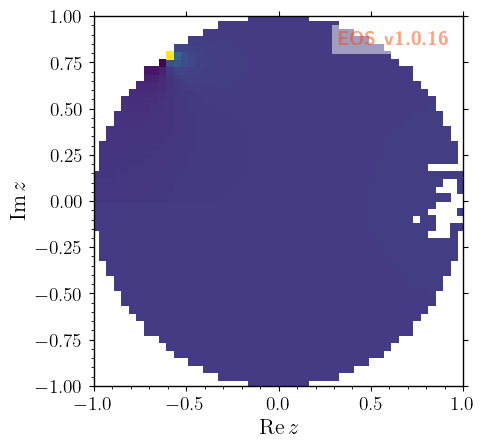

In [11]:
figure_args = """
plot:
  aspect: 1.0
  xaxis: { label: 'Re\\,$z$',  range: [-1.0, +1.0] }
  yaxis: { label: 'Im\\,$z$',  range: [-1.0, +1.0] }
  items:
  - { type: 'complex-plane', observable: 'b->s::Re{F17}(Re{z},Im{z})',
      variables: ['Re{z}', 'Im{z}'], resolution: 100
    }
"""
figure = eos.figure.FigureFactory.from_yaml(figure_args)
figure.draw()